# Principal Component Analysis and Reconstruction

Principal Component Analysis (PCA) is a dimensionality reduction algorithm that represents the data matrix as a set of principal components that are orthogonal to each other. Each of these principal components captures a source of variance in the original data matrix such that we can reduce the dimensions of the data while preserving as much information as possible. Principal components are defined as the eigenvectors of the covariance matrix of the data; thus, we will be implementing PCA using eigendecomposition.

This question will help you understand the basics of eigendecomposition. By examining the dimensionality reduction and reconstruction of images, you will think and learn more about informative representations of data.

Let’s do PCA and reconstruct pictures of faces in the PCA basis. As we will be making many visualizations of images, plot these images in a reasonable way (e.g. make the images smaller).

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1dg5T_qbDC0FG_aGk3cTtWB7vLvQn5d1o' # data.txt
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('faces.csv')

## PCA

In [17]:
faces = pd.read_csv('faces.csv', header=None).to_numpy()

In [18]:
# Col --> 1 image
n, d = faces.shape

In [19]:
S = 1.0/n * faces.T @ (faces)

In [20]:
S.shape

(8064, 8064)

What are the eigenvalues ? What is the sum of the eigenvalues in S ?

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(S)

In [22]:
with open('eigenvalues.txt', 'wb') as f:
    np.save(f, eigenvalues)

In [23]:
with open('eigenvectors.txt', 'wb') as f:
    np.save(f, eigenvectors)

In [24]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

In [25]:
eigenvalues_print = [1, 2, 10, 30, 50]
for i in eigenvalues_print:
    print(f'lambda_{i} = {eigenvalues[i-1]:.3f}')

lambda_1 = 781.813+0.000j
lambda_2 = 161.152+0.000j
lambda_10 = 3.340+0.000j
lambda_30 = 0.809+0.000j
lambda_50 = 0.390+0.000j


In [26]:
tr_S = np.trace(S)
print(f'The sum of eigenvalues is {tr_S:.3f}')

The sum of eigenvalues is 1084.207


Plot this fractional reconstruction error for each of the first 50 values of k (i.e. k from 1 to 50). So the X-axis is k and the Y-axis is the fractional reconstruction error.

In [27]:
x = list(range(1, 51))
reconstruction_err = [ 1 - (np.sum(eigenvalues[:k]) / tr_S)  for k in x]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


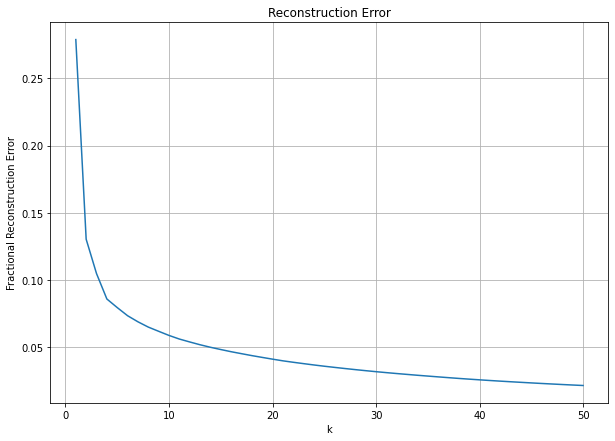

In [28]:
plt.figure(figsize=(10, 7))
plt.xlabel("k")
plt.ylabel("Fractional Reconstruction Error")
plt.title("Reconstruction Error")
plt.plot(x, reconstruction_err)

plt.grid()

plt.savefig(f'reconstruction_err.png')

## Visualization of the Eigen-Directions

Now let us get a sense of the what the top PCA directions are capturing (recall these are the directions which capture the most variance).

Display the first 10 eigenvectors as images.

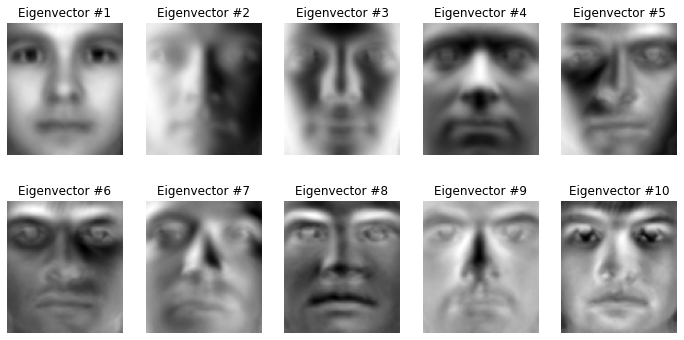

In [29]:
def show_top_n_faces(eigenvectors, n=10) -> None:
    
    row, col = 2, 5
    f = plt.figure(figsize=(12, 6))
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(row, col, i + 1)
        plt.imshow(eigenvectors[:, i].real.reshape((84,96)).T, cmap='gray')
        
        plt.title(f'Eigenvector #{i+1}')
        plt.axis('off')

    plt.savefig(f'images_c1.png')
    plt.show(block=True)

show_top_n_faces(eigenvectors)

We will now observe the reconstruction using PCA on a sample of images
composed of the following images:

1. image 1 (row 0)
2. image 24 (row 23)
3. image 65 (row 64)
4. image 68 (row 67)
5. image 257 (row 256)

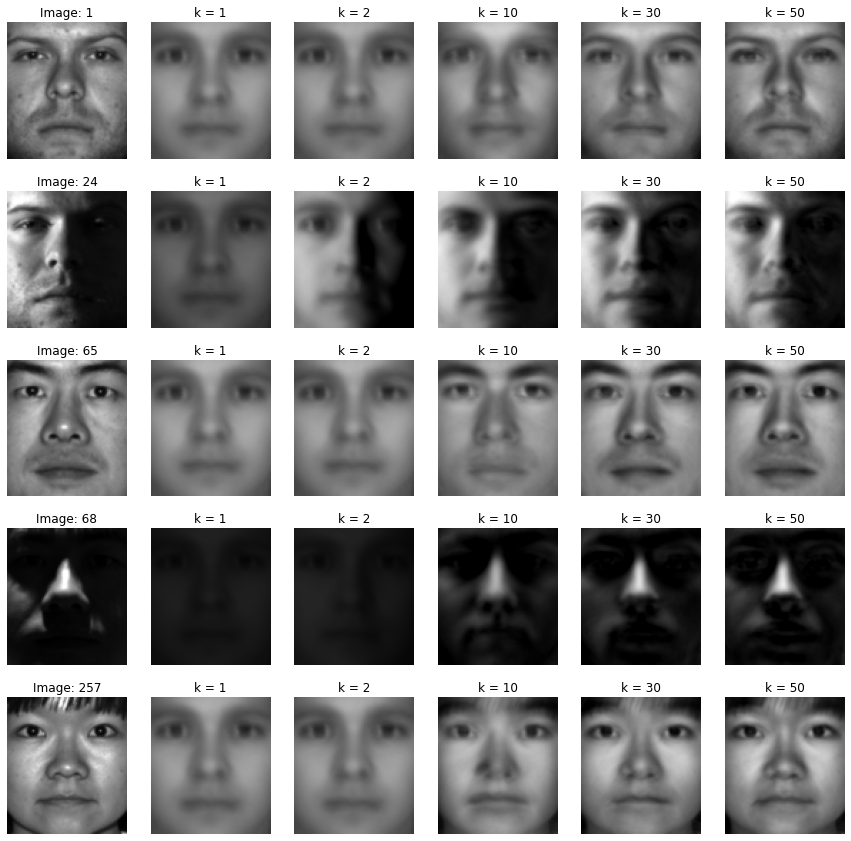

In [30]:
images_nums = [1, 24, 65, 68, 257]
k_nums = [-1, 1, 2, 10, 30, 50]

def show_images(eigenvectors, images_nums, k_nums):

    row, col = 5, 6
    f, ax = plt.subplots(row, col, figsize=(15,15))

    for i, img_num in enumerate(images_nums):
        for j, k in enumerate(k_nums):

            img_idx = img_num - 1

            # img_matrix = eigenvectors[:, img_idx].real
            img_matrix = faces[img_idx, :]
            if k == -1:
                # img = img_matrix.reshape((84,96)).T
                img = img_matrix.reshape((84,96)).T

                ax[i, j].set_title(f'Image: {img_num}')
            else:
                U = eigenvectors.real[:, :k]
                reconstruction_matrix = U.dot(U.T)
                img = img_matrix.dot(reconstruction_matrix).reshape((84,96)).T

                ax[i, j].set_title(f'k = {k}')

            ax[i, j].imshow(img, cmap='gray', vmin=0, vmax=1)
            ax[i, j].axis('off')
    
    f.savefig('reconstructed_images.png')

show_images(eigenvectors, images_nums, k_nums)